In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

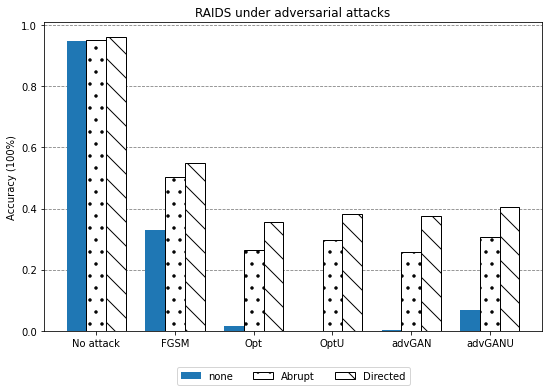

In [5]:
# ~~~~~~~~~~~~~~~~Overall_Accuracy~~~~~~~~~~~~~~~~
labels = ["No attack", "FGSM", "Opt", "OptU", "advGAN","advGANU"]
abrupt = [0.9506595636732623, 0.5023845763571791,0.26486555048198884, 0.29786910197869104,0.25725520040588534, 0.3055048198883815]
directed = [0.9601217656012176, 0.5502790461694571, 0.35593607305936076, 0.3835109081684424,0.37658548959918825, 0.404439370877727]
none = [0.9464738711314054,0.33102486047691526,0.015347539320142059,0.0007356671740233385,0.002663622526636225,0.06732623033992897]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, none, width, label="none", color="tab:blue")
rects2 = ax.bar(x , abrupt, width, label="Abrupt", color="white", hatch=".", edgecolor="black")
rects3 = ax.bar(x + width, directed, width, label="Directed", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("RAIDS under adversarial attacks")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()
fig.set_size_inches(8, 6)
plt.show()

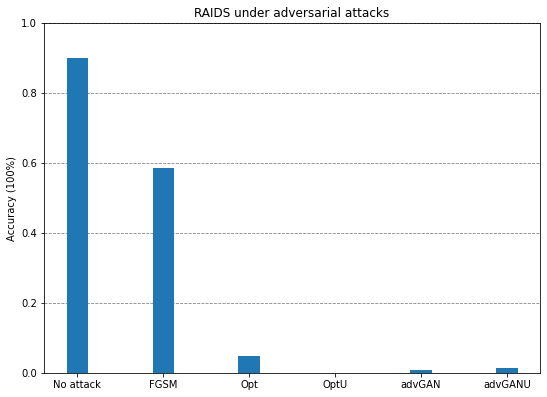

In [6]:
# ~~~~~~~~~~~~~~~~Overall_Accuracy~~~~~~~~~~~~~~~~
# No attack on CAN
labels = ["No attack", "FGSM", "Opt", "OptU", "advGAN","advGANU"]
none = [0.8997124978860138,0.5837138508371386,0.04879079993235244,0.0,0.006933874513783189,0.014205986808726534]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , none, width, label="none", color="tab:blue")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("RAIDS under adversarial attacks")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.set_ylim([0, 1])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()
fig.set_size_inches(8, 6)
plt.show()

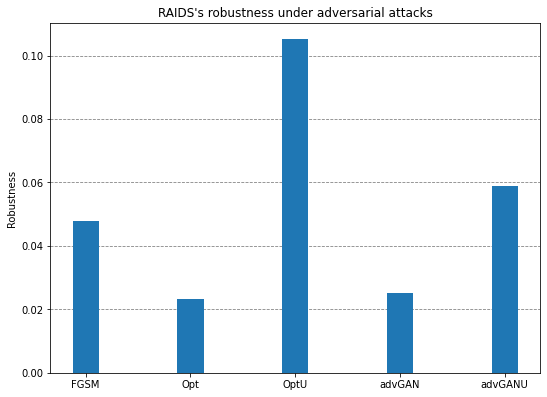

In [5]:
# ~~~~~~~~~~~~~~~~Robustness~~~~~~~~~~~~~~~~
# Empirical robustness assesses the robustness of a given classifier with respect to a specific
# attack and test data set. It is equivalent to the average minimal perturbation that the attacker
# needs to introduce for a successful attack, as introduced in [40].
labels = ["FGSM", "Opt", "OptU", "advGAN","advGANU"]
none = [0.047973264,0.023225036,0.105097264,0.025310282,0.05894368]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , none, width, label="none", color="tab:blue")

ax.set_ylabel("Robustness")
ax.set_title("RAIDS's robustness under adversarial attacks")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.set_ylim([0, 1])
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()
fig.set_size_inches(8, 6)
plt.show()

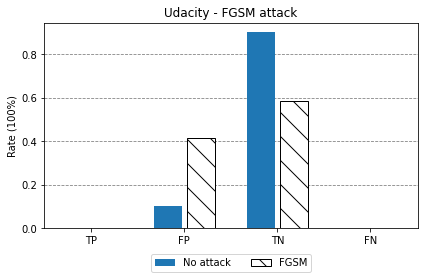

In [21]:
# FGSM
# TP, FN,TN,FP
# None
labels = ["TP","FP","TN","FN"]
RAIDS = [0.0,0.10028750211398613,0.8997124978860138,0.0]
attack = [0.0,0.4162861491628615,0.5837138508371386,0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="No attack", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="FGSM", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Rate (100%)")
ax.set_title("Udacity - FGSM attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

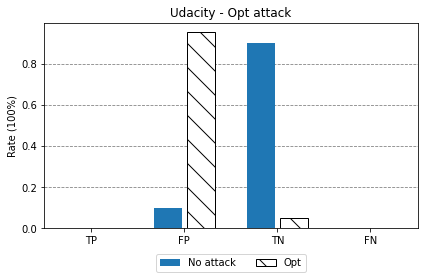

In [20]:
# Opt
# TP, FN,TN,FP
# None
labels = ["TP","FP","TN","FN"]
RAIDS = [0.0,0.10028750211398613,0.8997124978860138,0.0]
attack = [0.0,0.9512092000676475,0.04879079993235244,0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="No attack", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Rate (100%)")
ax.set_title("Udacity - Opt attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

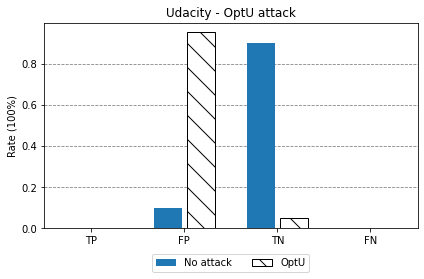

In [19]:
# OptU
# TP, FN,TN,FP
# None
labels = ["TP","FP","TN","FN"]
RAIDS = [0.0,0.10028750211398613,0.8997124978860138,0.0]
attack = [0.0,0.9512092000676475,0.04879079993235244,0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="No attack", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="OptU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Rate (100%)")
ax.set_title("Udacity - OptU attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

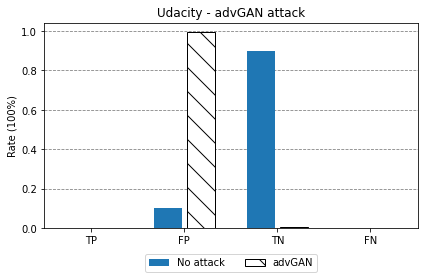

In [18]:
# advGAN
# TP, FN,TN,FP
# None
labels = ["TP","FP","TN","FN"]
RAIDS = [0.0,0.10028750211398613,0.8997124978860138,0.0]
attack = [0.0,0.9930661254862168,0.006933874513783189,0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="No attack", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGAN", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Rate (100%)")
ax.set_title("Udacity - advGAN attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

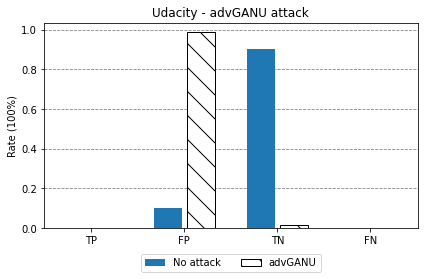

In [17]:
# advGANU
# TP, FN,TN,FP
# None
labels = ["TP","FP","TN","FN"]
RAIDS = [0.0,0.10028750211398613,0.8997124978860138,0.0]
attack = [0.0,0.9857940131912735,0.014205986808726534,0.0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="No attack", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGANU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Rate (100%)")
ax.set_title("Udacity - advGANU attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

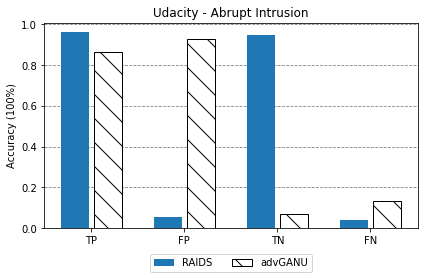

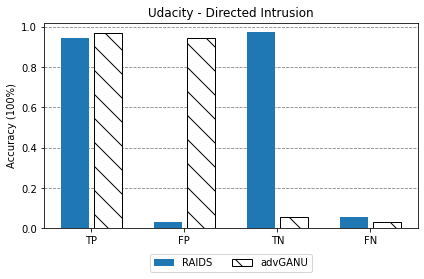

In [8]:
# advGAN Universal
# Abrupt
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.8652854122621565,0.9286102554810655,0.0713897445189346,0.13471458773784356]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGANU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9450324116946686,0.02880421364496749,0.9711957863550325,0.05496758830533139]
attack = [0.9675883053313931,0.943132252489507,0.056867747510492964,0.03241169466860696]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="advGANU", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

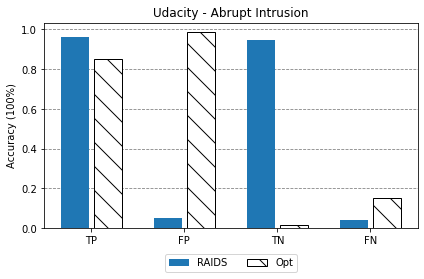

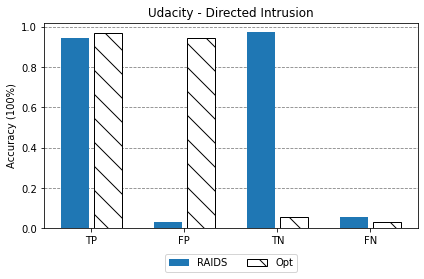

In [4]:
# advGAN Universal
# Abrupt
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.850063,0.984599,0.015401,0.149937]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9450324116946686,0.02880421364496749,0.9711957863550325,0.05496758830533139]
attack = [0.9675883053313931,0.943132252489507,0.056867747510492964,0.03241169466860696]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

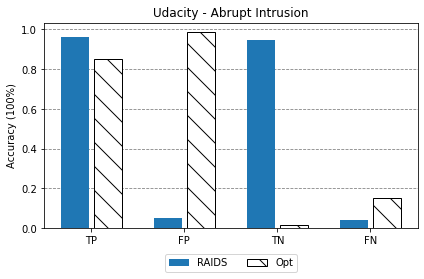

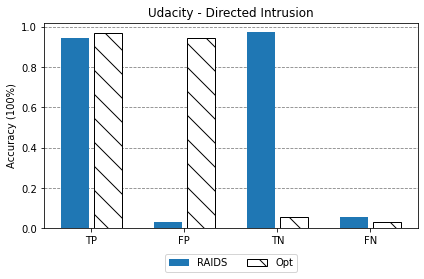

In [ ]:
# FGSM attack
# TP, FN,TN,FP
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9599154334038055,0.05330675847073745,0.9466932415292626,0.040084566596194506]
attack = [0.850063,0.984599,0.015401,0.149937]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Abrupt Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

# Directed
labels = ["TP","FP","TN","FN"]
RAIDS = [0.9450324116946686,0.02880421364496749,0.9711957863550325,0.05496758830533139]
attack = [0.9675883053313931,0.943132252489507,0.056867747510492964,0.03241169466860696]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="tab:blue")
rects2 = ax.bar(x + width / 2, attack, (width - 0.05), label="Opt", color="white", hatch="\\", edgecolor="black")

ax.set_ylabel("Accuracy (100%)")
ax.set_title("Udacity - Directed Intrusion")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()

plt.show()

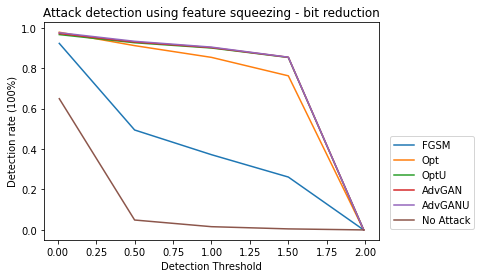

In [7]:
# Feature Squeezing - bit reduction
plt.ylabel("Detection rate (100%)")
plt.xlabel("Detection Threshold")
plt.ylabel("Detection rate (100%)")
plt.title("Attack detection using feature squeezing - bit reduction")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9225435481143244,0.49424995772027736,0.3720615592761711,0.26145780483680026,0.0], label = "FGSM")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9776763064434297,0.9114662607813293,0.8533739218670725,0.7621342803991206,0.0], label = "Opt")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9660916624386944,0.9257568070353458,0.8997124978860138,0.8529511246406224,0.0], label = "OptU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9714189074919668,0.9293928631828176,0.9018264840182648,0.8538812785388128,0.0], label = "AdvGAN")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9754777608658887,0.9329443598849991,0.9041941484863859,0.854219516319973,0.0], label = "AdvGANU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.6489937426010486,0.04895991882293252,0.01598173515981735,0.0050735667174023336,0.0], label = "No Attack")
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5))
plt.show()


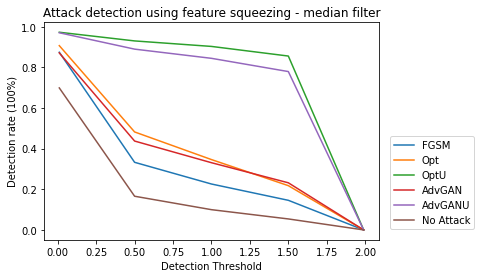

In [8]:
# Feature Squeezing - median filter
plt.ylabel("Detection rate (100%)")
plt.xlabel("Detection Threshold")
plt.ylabel("Detection rate (100%)")
plt.title("Attack detection using feature squeezing - median filter")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.8741755454084221,0.332656857771013,0.22585827836969388,0.145695924234737,0.0], label = "FGSM")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9067309318450871,0.48207339759851175,0.3461018095721292,0.21774057162185015,0.0], label = "Opt")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9726872991713175,0.9299847792998478,0.9029257568070354,0.8555724674446136,0.0], label = "OptU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.8709622864874006,0.43725689159479114,0.33071199052934214,0.23186199898528664,0.0], label = "AdvGAN")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9701505158126162,0.8895653644512092,0.8443260612210384,0.7792152883477085,0.0], label = "AdvGANU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.6987146964315915,0.16573651276847623,0.09961102655166582,0.05403348554033485,0.0], label = "No Attack")
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5))
plt.show()

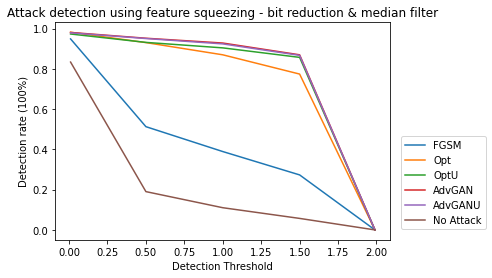

In [9]:
# Feature Squeezing - both
plt.ylabel("Detection rate (100%)")
plt.xlabel("Detection Threshold")
plt.ylabel("Detection rate (100%)")
plt.title("Attack detection using feature squeezing - bit reduction & median filter")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9484187383730762,0.5126839167935059,0.389142567224759,0.2731270082868256,0.0], label = "FGSM")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9815660409267715,0.9301538981904278,0.86952477591747,0.773888043294436,0.0], label = "Opt")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9727718586166074,0.9311686115339083,0.9039404701505158,0.8567562996786741,0.0], label = "OptU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.980551327583291,0.9518011161846778,0.9279553526128869,0.86952477591747,0.0], label = "AdvGAN")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.9786910197869102,0.9503636056147472,0.9237273803483849,0.8667343142228987,0.0], label = "AdvGANU")
plt.plot([0.01, 0.5, 1.0, 1.5, 1.99], [0.8334178927786233,0.19017419245729747,0.11026551665821072,0.05716218501606629,0.0], label = "No Attack")
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5))
plt.show()
